# Evaluation Project - 7

##  Loan Application Status Prediction

### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [9]:
#importing all the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import os

In [13]:
#getting data
os.chdir("C:\github_repo\Files")
df = pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


## DATA INSPECTION

In [14]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
484,LP002543,Male,Yes,2,Graduate,No,8333,0.0,246.0,360.0,1.0,Semiurban,Y
504,LP002619,Male,Yes,0,Not Graduate,No,3814,1483.0,124.0,300.0,1.0,Semiurban,Y
146,LP001516,Female,Yes,2,Graduate,No,14866,0.0,70.0,360.0,1.0,Urban,Y
162,LP001565,Male,Yes,1,Graduate,No,3089,1280.0,121.0,360.0,0.0,Semiurban,N
510,LP002637,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural,N


In [16]:
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
#shape of data
df.shape

(614, 13)

In [19]:
#datatypes of all columns
df.dtypes 

Loan_ID              object 
Gender               object 
Married              object 
Dependents           object 
Education            object 
Self_Employed        object 
ApplicantIncome      int64  
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        object 
Loan_Status          object 
dtype: object

In [20]:
#information of all colmns from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [21]:
df.nunique().to_frame("Unique Values")

,Unique Values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


OBSERVATION

Loan ID has all 614 unique values. It is just a list of unique identifiers on each row without adding much insight into the prediction of our target label. so we can drop tis column.

In [22]:
df.drop("Loan_ID", axis=1, inplace=True)

In [23]:
#checking the categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [24]:
#checking the numeric columns for visualization
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col) 

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


## STATISTICAL SUMMARY

In [25]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


OBSERVATION

The first column counts the total number of rows present in each column and we can see the numbers mismatching the count indicating absence of data in them. Similarly, the mean column gives the average mean information of the columns, the std column shows the standard deviation data, min provides the minimum data present in the numeric columns, 25%-50%-75% gives the first quartile, second quartile and third quartile data for each numeric column and max provides the maximum data present in each of the columns.

In [26]:
df.isnull().sum()

Gender               13
Married              3 
Dependents           15
Education            0 
Self_Employed        32
ApplicantIncome      0 
CoapplicantIncome    0 
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area        0 
Loan_Status          0 
dtype: int64

In [27]:
#removing duplicates
print(f"Rows and Columns before dropping duplicates: ", df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df.shape)

Rows and Columns before dropping duplicates:  (614, 12)
Rows and Columns after dropping duplicates:  (614, 12)


## FILLING THE MISSING VALUES

In [28]:
# filling continous data columns with the mean value of that column
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

# filling categorical data columns with the mode value of that column
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<AxesSubplot:>

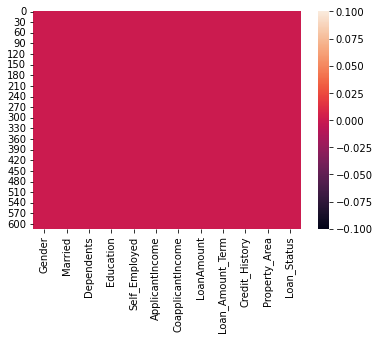

In [29]:
#checking the null values
print(df.isnull().sum())
sns.heatmap(df.isnull())

In [30]:
#after filling null data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


## EXPLANATORY DATA ANALYSIS

In [31]:
#listing numeric and categorial type colums
print(f"Object Data Type Column Names: \n", cat_col)
print(f"\nNumeric Data Type Column Names: \n", num_col)

Object Data Type Column Names: 
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Numeric Data Type Column Names: 
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


## UNIVARIATE ANALYSIS

Y    422
N    192
Name: Loan_Status, dtype: int64


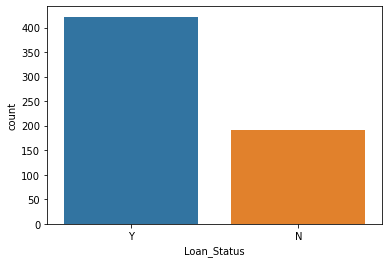

In [32]:
# Visualizing the label (Loan Status)
print(df["Loan_Status"].value_counts())
sns.countplot(df["Loan_Status"])
plt.show()

Male      502
Female    112
Name: Gender, dtype: int64


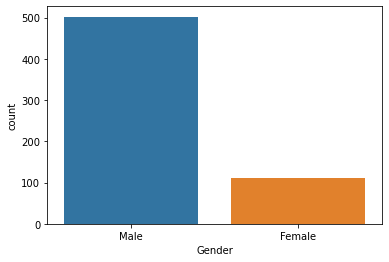

In [33]:
#Gender
print(df["Gender"].value_counts())
sns.countplot(df["Gender"])
plt.show()

Yes    401
No     213
Name: Married, dtype: int64


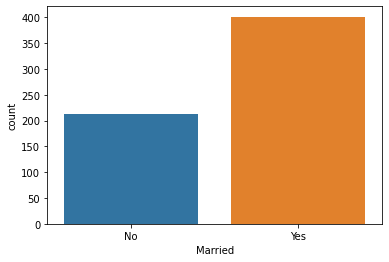

In [34]:
#Married
print(df["Married"].value_counts())
sns.countplot(df["Married"])
plt.show()

0     360
1     102
2     101
3+    51 
Name: Dependents, dtype: int64


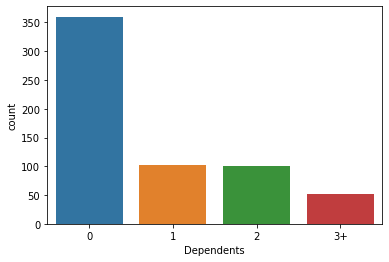

In [35]:
#Dependents
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


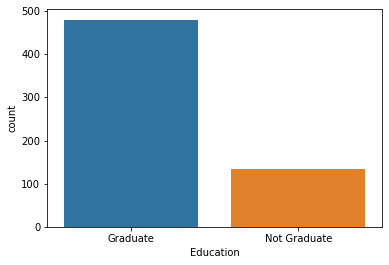

In [36]:
#Education
print(df["Education"].value_counts())
sns.countplot(df["Education"])
plt.show()

No     532
Yes    82 
Name: Self_Employed, dtype: int64


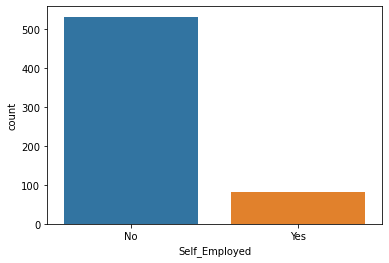

In [37]:
#Self_Employed
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"])
plt.show()

1.0    525
0.0    89 
Name: Credit_History, dtype: int64


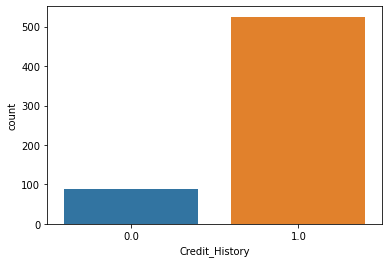

In [38]:
# Credit_History
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"])
plt.show()

OBSERVATION

-The applicants in males are considerably higher.

-Married loan applicant are comparitevely higher.

-The applicants who have 0 dependents have high counts and the applicants having more than 3 dependents counts are very less.

-Graduate applicants are comparitively higher.

-Applicant who are not self employeed are comparitively higher.

-Most of the applicants who have credit history 1 are high in numbers.

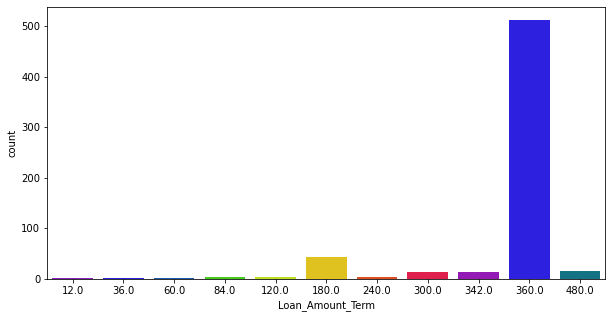

In [39]:
try:
    plt.figure(figsize=(10,5))
    col_name = 'Loan_Amount_Term'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")
    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    pass

## MULTIVARIATE ANALYSIS

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

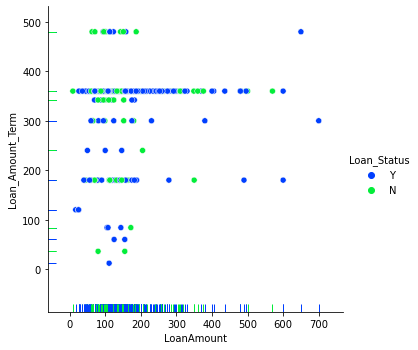

In [40]:
plt.style.use('seaborn-bright')
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status', legend=False)

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

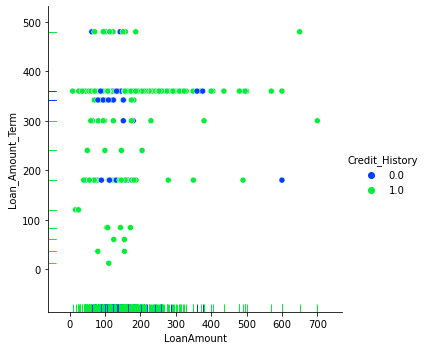

In [41]:
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History', legend=False)

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

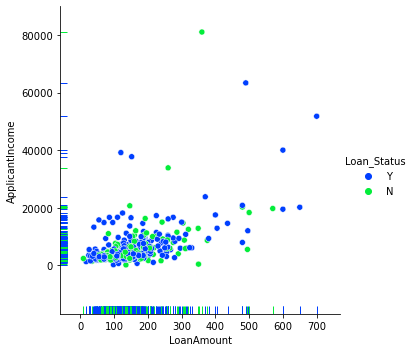

In [42]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', legend=False)

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

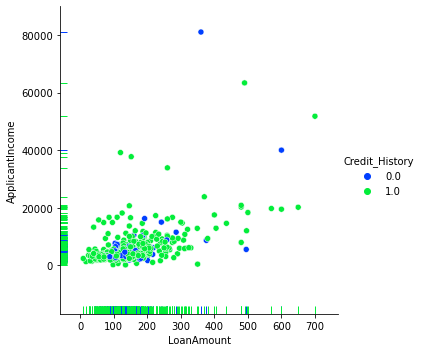

In [43]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History', legend=False)

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

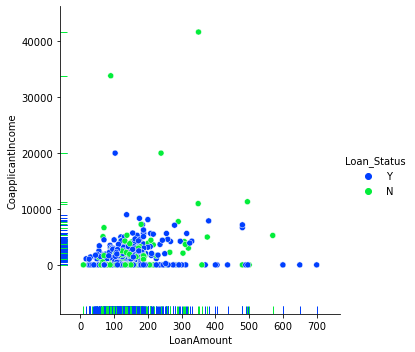

In [44]:
sns.relplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status', legend=False)

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

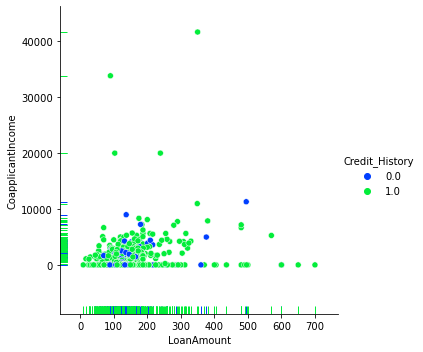

In [45]:
sns.relplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History', legend=False)

## PAIRPLOT

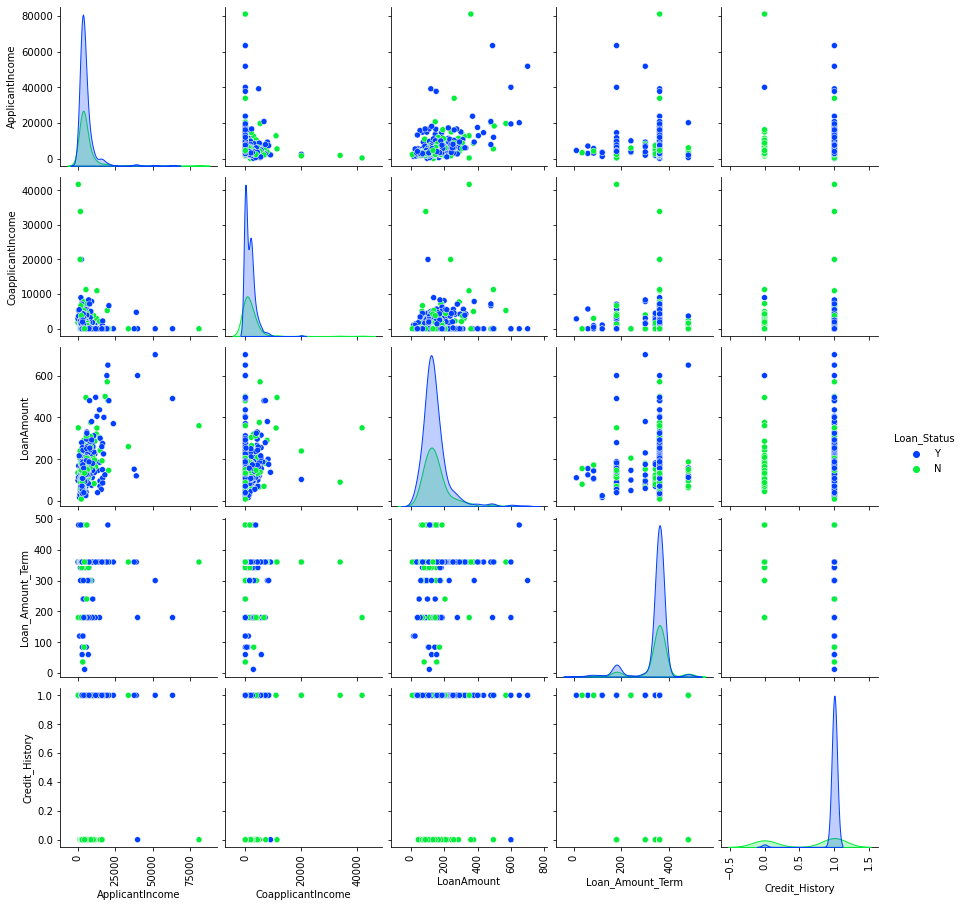

In [46]:
# plt.style.use('default')
g = sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

## ENCODING CATEGORIAL COLUMNS USING LABEL ENCODER

In [47]:
# Label Encoder
le = LabelEncoder()
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [48]:
# Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = oe.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] = oe.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Self_Employed'] = oe.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area'] = oe.fit_transform(df['Property_Area'].values.reshape(-1,1))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


## OUTLIERS

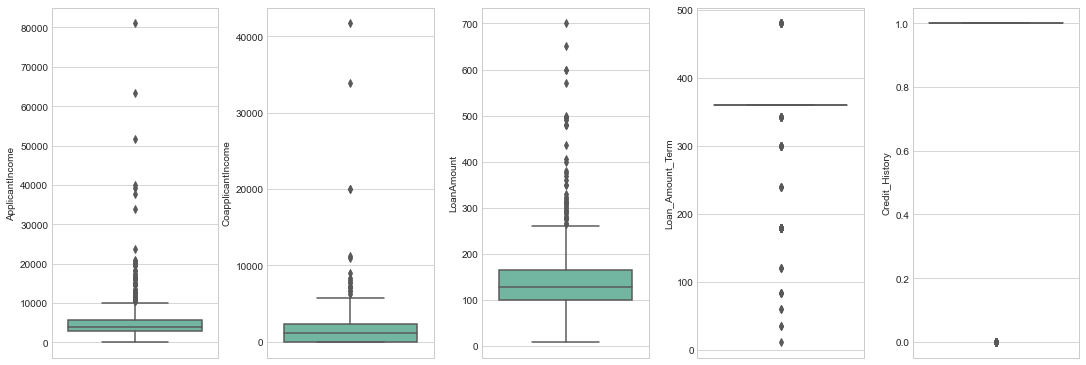

In [49]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[num_col].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set2")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

OBSERVATION

Outliers are present in numercal columns of dataframe.

## SKEWNESS

In [50]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

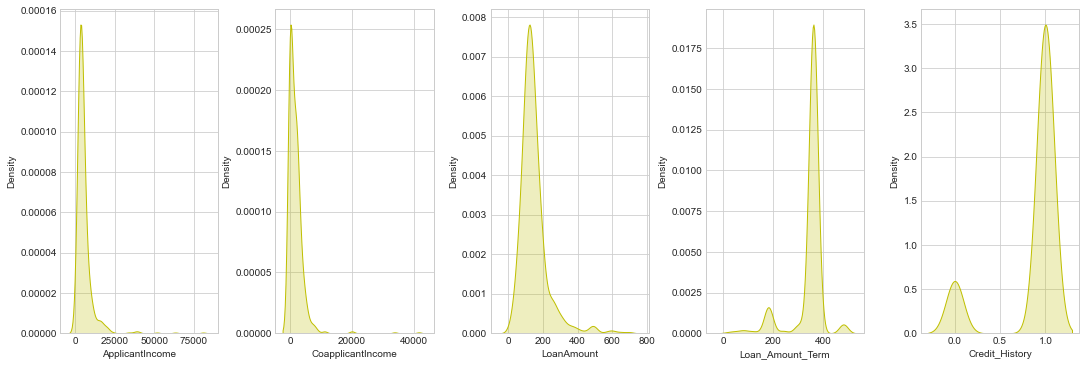

In [51]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[num_col].items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

OBSERVATION

Distribution plot we can see the skewness details present in our numerical data

## CORRELATION

In [52]:
# Checking the correlation between features and the target
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Gender'),
  Text(0, 1.5, 'Married'),
  Text(0, 2.5, 'Dependents'),
  Text(0, 3.5, 'Education'),
  Text(0, 4.5, 'Self_Employed'),
  Text(0, 5.5, 'ApplicantIncome'),
  Text(0, 6.5, 'CoapplicantIncome'),
  Text(0, 7.5, 'LoanAmount'),
  Text(0, 8.5, 'Loan_Amount_Term'),
  Text(0, 9.5, 'Credit_History'),
  Text(0, 10.5, 'Property_Area'),
  Text(0, 11.5, 'Loan_Status')])

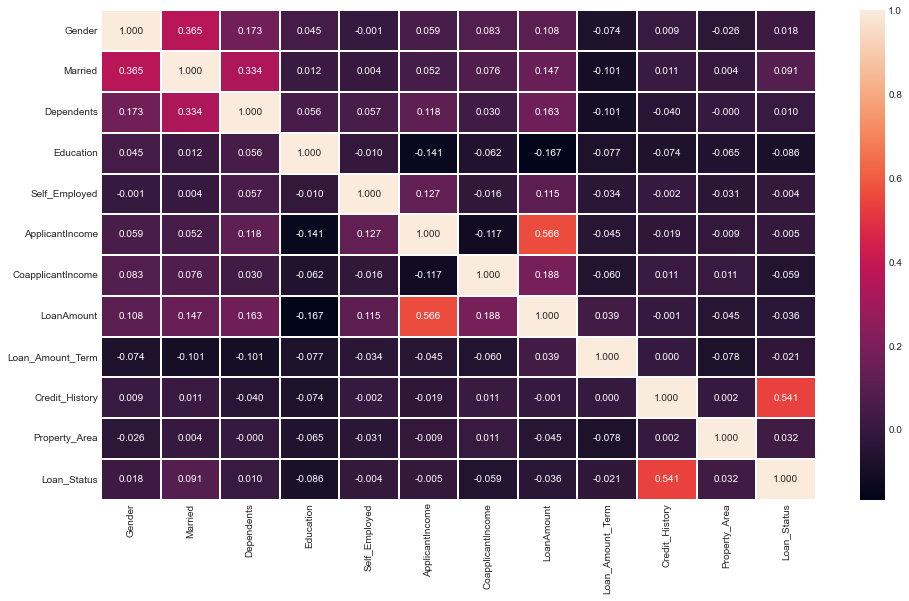

In [53]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

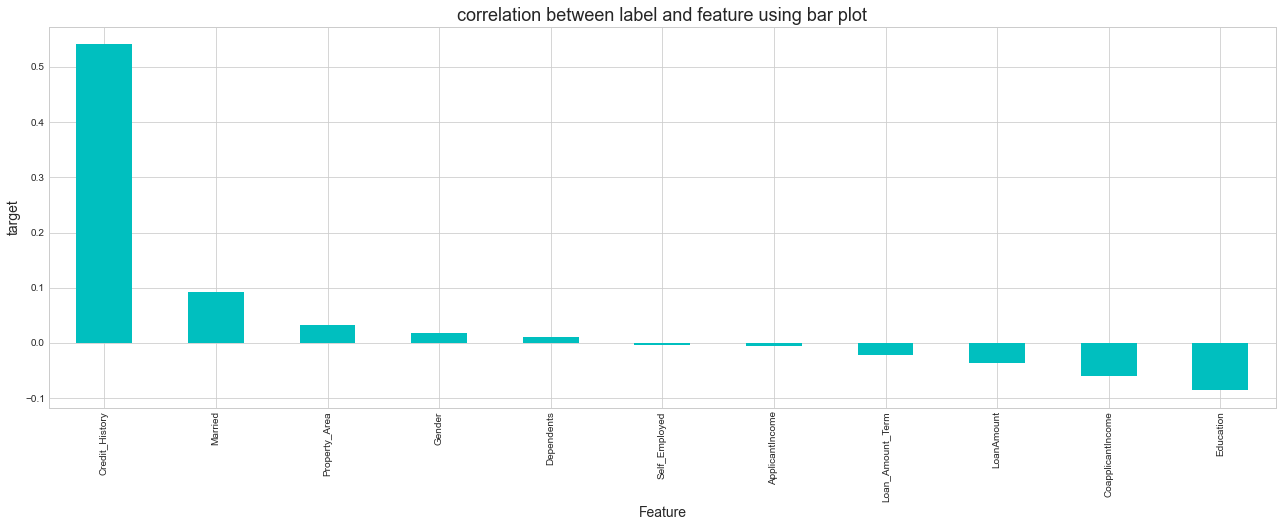

In [54]:
# Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

## Splitting the dataset into Features and Target

In [55]:
X = df.drop('Loan_Status', axis=1)
Y = df['Loan_Status']

In [56]:
X.shape

(614, 11)

In [57]:
Y.shape

(614,)

## SMOTE

In [58]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [59]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, Y = SM.fit_resample(X,Y)

In [60]:
Y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [61]:
X.shape

(844, 11)

In [62]:
Y.shape

(844,)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

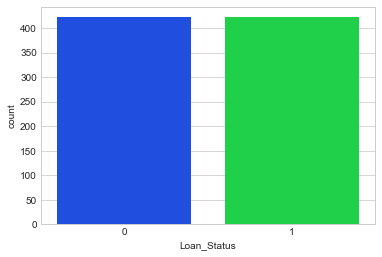

In [63]:
# Visualize the data after balancing
sns.countplot(Y)

## STANDARD SCALER 

In [64]:
#Scaling the independant variable (X) to get all the columns in a standard scale
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [65]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.486054,-1.416592,-0.762486,-0.566774,-0.400226,0.044417,-0.555309,-0.025016,0.274047,0.566567,1.289384
1,0.486054,0.766272,0.269011,-0.566774,-0.400226,-0.145992,-0.038658,-0.245500,0.274047,0.566567,-1.341533
2,0.486054,0.766272,-0.762486,-0.566774,2.761344,-0.384078,-0.555309,-0.987945,0.274047,0.566567,1.289384
3,0.486054,0.766272,-0.762486,1.939875,-0.400226,-0.446795,0.252558,-0.341299,0.274047,0.566567,1.289384
4,0.486054,-1.416592,-0.762486,-0.566774,-0.400226,0.067128,-0.555309,-0.089826,0.274047,0.566567,1.289384


## MultiCollinearity with Variance Inflation Factor

In [66]:
#importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [68]:
calc_vif(X)

,variables,VIF FACTOR
0,Gender,1.178864
1,Married,1.272031
2,Dependents,1.170598
3,Education,1.079914
4,Self_Employed,1.020896
5,ApplicantIncome,1.640569
6,CoapplicantIncome,1.166169
7,LoanAmount,1.747830
8,Loan_Amount_Term,1.047980
9,Credit_History,1.015500



OBSERVATION

All columns have very less VIF ,This proves no multicollinearity is present in dataset.

Now the Dataset is ready for Machine Learning

## MACHINE LEARNING

### FINDING BEST RANDOM STATE

Since the y (Target) has Categorical values, we will use Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
lr = LogisticRegression()

In [70]:
#BEST RANDOM STATE
maxAccu = 0   # maximum accuracy
maxRS = 0     # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state                           ', maxRS)

accuracy 0.7041420118343196 random_state 1
accuracy 0.7041420118343196 random_state                            1
accuracy 0.7396449704142012 random_state 2
accuracy 0.7396449704142012 random_state                            2
accuracy 0.757396449704142 random_state 3
accuracy 0.757396449704142 random_state                            3
accuracy 0.7159763313609467 random_state 4
accuracy 0.757396449704142 random_state 5
accuracy 0.7455621301775148 random_state 6
accuracy 0.7810650887573964 random_state 7
accuracy 0.7810650887573964 random_state                            7
accuracy 0.727810650887574 random_state 8
accuracy 0.7396449704142012 random_state 9
accuracy 0.6745562130177515 random_state 10
accuracy 0.727810650887574 random_state 11
accuracy 0.7751479289940828 random_state 12
accuracy 0.727810650887574 random_state 13
accuracy 0.7159763313609467 random_state 14
accuracy 0.7218934911242604 random_state 15
accuracy 0.727810650887574 random_state 16
accuracy 0.7455621301775148 rand

In [71]:
#importing required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [72]:
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=68)

In [73]:
# creating a function to run all the classifiers

def classifier(model, X, Y):
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=68) 
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [74]:
#Logistic Regression
model = LogisticRegression()
classifier(model, X, Y)

Accuracy Score: 76.92307692307693

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.57      0.70        80
           1       0.71      0.94      0.81        89

    accuracy                           0.77       169
   macro avg       0.81      0.76      0.76       169
weighted avg       0.80      0.77      0.76       169

Cross Validation Score: 73.1086221470837

Accuracy Score - Cross Validation Score is 3.814454775993241


In [75]:
#GAUSSIAN NAIVE BAYES
model = GaussianNB()
classifier(model, X, Y)

Accuracy Score: 75.14792899408283

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.53      0.67        80
           1       0.69      0.96      0.80        89

    accuracy                           0.75       169
   macro avg       0.80      0.74      0.73       169
weighted avg       0.80      0.75      0.74       169

Cross Validation Score: 73.34742180896026

Accuracy Score - Cross Validation Score is 1.8005071851225694


In [76]:
#SVC CLASSIFIER(RBF)
model = SVC(kernel='rbf')
classifier(model, X, Y)

Accuracy Score: 79.28994082840237

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.60      0.73        80
           1       0.73      0.97      0.83        89

    accuracy                           0.79       169
   macro avg       0.83      0.78      0.78       169
weighted avg       0.83      0.79      0.78       169

Cross Validation Score: 75.71569456184841

Accuracy Score - Cross Validation Score is 3.5742462665539563


In [77]:
#SVL(LINEAR)
model = SVC(kernel='linear')
classifier(model, X,  Y)


Accuracy Score: 75.7396449704142

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.53      0.67        80
           1       0.69      0.97      0.81        89

    accuracy                           0.76       169
   macro avg       0.81      0.75      0.74       169
weighted avg       0.81      0.76      0.74       169

Cross Validation Score: 73.70386024232177

Accuracy Score - Cross Validation Score is 2.0357847280924375


In [78]:
#SVC(POLY)
model = SVC(kernel='poly')
classifier(model, X, Y)

Accuracy Score: 74.55621301775149

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.55      0.67        80
           1       0.69      0.92      0.79        89

    accuracy                           0.75       169
   macro avg       0.78      0.74      0.73       169
weighted avg       0.77      0.75      0.74       169

Cross Validation Score: 70.61918850380388

Accuracy Score - Cross Validation Score is 3.9370245139476054


In [79]:
#DECISION TREE CLASSIFIER
model = DecisionTreeClassifier()
classifier(model, X, Y)

Accuracy Score: 73.37278106508876

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72        80
           1       0.75      0.74      0.75        89

    accuracy                           0.73       169
   macro avg       0.73      0.73      0.73       169
weighted avg       0.73      0.73      0.73       169

Cross Validation Score: 75.48464356156664

Accuracy Score - Cross Validation Score is -2.111862496477883


In [80]:
#K NEIGHBORS CLASSIFIER
model = KNeighborsClassifier()
classifier(model, X, Y)

Accuracy Score: 71.59763313609467

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.62      0.68        80
           1       0.70      0.80      0.75        89

    accuracy                           0.72       169
   macro avg       0.72      0.71      0.71       169
weighted avg       0.72      0.72      0.71       169

Cross Validation Score: 72.27881093265708

Accuracy Score - Cross Validation Score is -0.6811777965624088


In [81]:
#SGD CLASSIFIER
model = SGDClassifier()
classifier(model, X, Y)

Accuracy Score: 73.37278106508876

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.61      0.69        80
           1       0.71      0.84      0.77        89

    accuracy                           0.73       169
   macro avg       0.74      0.73      0.73       169
weighted avg       0.74      0.73      0.73       169

Cross Validation Score: 63.50028176951253

Accuracy Score - Cross Validation Score is 9.872499295576226


In [82]:
#RANDOM FOREST CLASSIFIER
model = RandomForestClassifier(random_state=62)
classifier(model, X, Y)

Accuracy Score: 82.24852071005917

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79        80
           1       0.79      0.91      0.84        89

    accuracy                           0.82       169
   macro avg       0.83      0.82      0.82       169
weighted avg       0.83      0.82      0.82       169

Cross Validation Score: 83.18610876303184

Accuracy Score - Cross Validation Score is -0.9375880529726714


In [83]:
#EXTRATREES CLASSIFIER
model = ExtraTreesClassifier(random_state=62)
classifier(model, X, Y)

Accuracy Score: 85.79881656804734

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.76      0.84        80
           1       0.82      0.94      0.87        89

    accuracy                           0.86       169
   macro avg       0.87      0.85      0.86       169
weighted avg       0.87      0.86      0.86       169

Cross Validation Score: 82.83178360101438

Accuracy Score - Cross Validation Score is 2.9670329670329636


In [84]:
#ADA BOOST CLASSIFIER
model = AdaBoostClassifier()
classifier(model, X, Y)

Accuracy Score: 81.06508875739645

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.71      0.78        80
           1       0.78      0.90      0.83        89

    accuracy                           0.81       169
   macro avg       0.82      0.81      0.81       169
weighted avg       0.82      0.81      0.81       169

Cross Validation Score: 81.16723020569175

Accuracy Score - Cross Validation Score is -0.10214144829529914


In [85]:
#GRADIENT BOOSTING CLASSIFIER
model = GradientBoostingClassifier()
classifier(model, X, Y)

Accuracy Score: 82.24852071005917

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79        80
           1       0.79      0.91      0.84        89

    accuracy                           0.82       169
   macro avg       0.83      0.82      0.82       169
weighted avg       0.83      0.82      0.82       169

Cross Validation Score: 82.71625810087349

Accuracy Score - Cross Validation Score is -0.467737390814321


## HYPER PARAMETER TUNING 

In [86]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=62)

In [87]:
x_test.shape

(169, 11)

In [88]:
y_test.shape

(169,)

In [89]:
x_train.shape

(675, 11)

In [90]:
y_train.shape

(675,)

In [91]:
# creating parameters list to pass into GridSearchCV

parameters = {'n_estimators': [1,50,100,150],
'learning_rate': [0.1,0.4,0.7,1],
'algorithm': ['SAMME']}

In [92]:
GCV = GridSearchCV(AdaBoostClassifier(), parameters, cv=5)

In [93]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME'],
                         'learning_rate': [0.1, 0.4, 0.7, 1],
                         'n_estimators': [1, 50, 100, 150]})

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [94]:
GCV.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 100}

## FINAL MODE 

In [95]:
# final model with best parameters
final_modelc = AdaBoostClassifier(algorithm = 'SAMME',learning_rate = 1 , n_estimators=100, random_state = None)   

In [96]:
#final fit
final_fitc = final_modelc.fit(x_train,y_train) 

In [97]:
#final prediction
final_predc = final_modelc.predict(x_test)

In [98]:
#checking accuracy score
best_acc_score = (accuracy_score(y_test, final_predc))*100   
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  87.57396449704143


In [99]:
#Final Cross Validation Score
final_cv_score = (cross_val_score(final_modelc, X, Y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 81.76246830092984


In [100]:
#Final Classification Report
final_class_report = classification_report(y_test, final_predc)
print("\nClassification Report:\n", final_class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86        80
           1       0.83      0.97      0.89        89

    accuracy                           0.88       169
   macro avg       0.89      0.87      0.87       169
weighted avg       0.89      0.88      0.87       169



## CONFUSION MATRIX

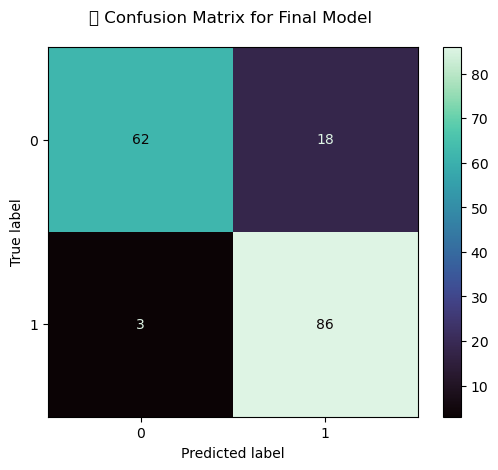

In [101]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(final_modelc, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Final Model \n')
plt.show()

OBSERVATION

The number of times we got the correct outputs and the number of times our Machine Learning model missed to provide the correct prediction (depicting in the black boxes).

## AUC ROC CURVE

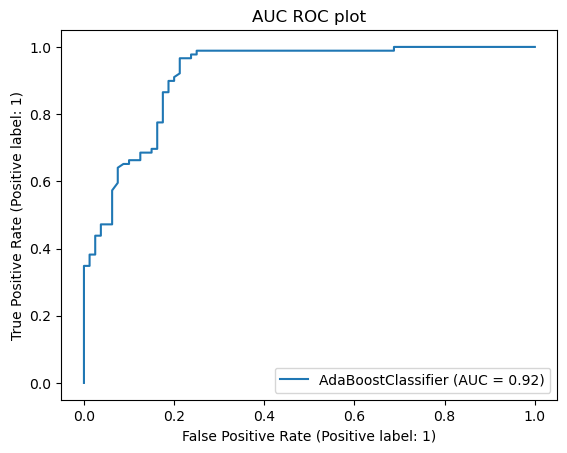

In [102]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_modelc, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

OBSERVATION

We got AUC Score of 0.92 which is really good.

## SAVING MODEL IN PICKLE FORMAT

In [103]:
# pickeling or serialization of a file
import pickle
filename = 'Loan_Application_Status_Final_Mode.pkl'
pickle.dump(final_modelc, open(filename, 'wb'))

## PREDICTED COCLUSION

In [104]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(final_modelc.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,1,1
6,0,1
7,1,1
8,0,1
9,0,0


In [105]:
#saving predicted dataset as CSV file
df_comparisonc.to_csv('Loan_Application_Status_saved_Prediction_values.csv')

### FINAL OBSERVATION

Best Model for this Problem is found to be "ADA BOOST CLASSIFIER" with best accuracy of 84% on dataset.

..................................................................................................................THANKYOU.....................................................................................................